# Ben Schaeffer
## Unsolved Crimes

The question i'm looking to answer with this analysis is which crimes have the highest rates of being unsolved.  We do this by analyzing a dataset built from the crimes in San Francisco in the year 2016

In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('policeData.csv')
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Here we are cleaning the dataset, we drop the columns we dont need, as well as scrubbing some crimes that we wont use in our analysis, such as non-criminal, and missing person. We then print out the head to make sure the data looks like we want.

In [6]:
#drop the columns that will not be used in our analysis
labelstodrop = ["X","Y","Address","Time","Date", "Location","PdId", "PdDistrict", "DayOfWeek"]
data.drop(columns = labelstodrop, inplace = True)
#get rid of any rows where the category is non criminal/missing person
data = data[data.Category != 'NON-CRIMINAL']
data = data[data.Category != 'MISSING PERSON']
data = data[data.Category != 'RUNAWAY']
data = data[data.Category != 'SUICIDE']
data.head()

,IncidntNum,Category,Descript,Resolution
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,"ARREST, BOOKED"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE","ARREST, BOOKED"
2,141059263,WARRANTS,WARRANT ARREST,"ARREST, BOOKED"
5,160002869,ASSAULT,BATTERY,NONE
6,160003130,OTHER OFFENSES,PAROLE VIOLATION,"ARREST, BOOKED"


here we use np.where to figure out how many of our crimes have NONE in the resolution category.

In [7]:
#use np.where to find how many resolved crimes vs nonresolved crimes there are
mylist = np.where(data['Resolution'] == 'NONE', 'unresolved', 'resolved')
mylist

array(['resolved', 'resolved', 'resolved', ..., 'unresolved',
       'unresolved', 'unresolved'], dtype='<U10')

We use a counter from the collections library to tell us how many of each element are in our list (created in previous cell)

In [8]:
import collections
mycollection = collections.Counter(mylist)
mycollection

Counter({'resolved': 40214, 'unresolved': 87873})

so we have 40214 crimes with resolution, and 87873 crimes without a resolution.

In [9]:
mycollection['unresolved']/data['Category'].count()

0.686041518655289

Here we can see around 69% of crimes have no resolution, we find this by dividing the number of unresolved crimes by the total number of crimes

We initialize an empty dicitonary, and then use the same counter function we used earlier to go through out dataframe and see how many of each crime we have.  We then use the OrderedDict function to sort them alphabetically.

In [10]:
AllCrimeOccuranceDict = {}
AllCrimeOccuranceDict = collections.Counter(data['Category'])
AllCrimeOccuranceDict = collections.OrderedDict(sorted(AllCrimeOccuranceDict.items())) 
AllCrimeOccuranceDict

OrderedDict([('ARSON', 286),
             ('ASSAULT', 13577),
             ('BAD CHECKS', 34),
             ('BRIBERY', 66),
             ('BURGLARY', 5802),
             ('DISORDERLY CONDUCT', 658),
             ('DRIVING UNDER THE INFLUENCE', 378),
             ('DRUG/NARCOTIC', 4243),
             ('DRUNKENNESS', 465),
             ('EMBEZZLEMENT', 168),
             ('EXTORTION', 60),
             ('FAMILY OFFENSES', 53),
             ('FORGERY/COUNTERFEITING', 619),
             ('FRAUD', 2635),
             ('GAMBLING', 20),
             ('KIDNAPPING', 257),
             ('LARCENY/THEFT', 40409),
             ('LIQUOR LAWS', 156),
             ('LOITERING', 42),
             ('OTHER OFFENSES', 19599),
             ('PORNOGRAPHY/OBSCENE MAT', 4),
             ('PROSTITUTION', 641),
             ('RECOVERED VEHICLE', 736),
             ('ROBBERY', 3299),
             ('SECONDARY CODES', 1841),
             ('SEX OFFENSES, FORCIBLE', 940),
             ('SEX OFFENSES, NON FORCIBLE',

We do some more data filtering here, we only keep the crimes with NONE under the resolution.  So now we have a dataframe of all of our unsolved crimes.

In [11]:
unresolvedData = data[data.Resolution == 'NONE']
unresolvedData.head()

,IncidntNum,Category,Descript,Resolution
5,160002869,ASSAULT,BATTERY,NONE
10,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,NONE
14,160004069,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, FORCIBLE ENTRY",NONE
16,160004241,ROBBERY,"ROBBERY, ARMED WITH A KNIFE",NONE
17,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,NONE


As we did before, we use the counter function, but this time only counting the crimes with no resolution to them, we do the same OrderedDict function to sort them in alphabetical order

In [12]:
unresolvedCrimeOccuranceDict = {}
unresolvedCrimeOccuranceDict = collections.Counter(unresolvedData['Category'])
unresolvedCrimeOccuranceDict = collections.OrderedDict(sorted(unresolvedCrimeOccuranceDict.items()))
unresolvedCrimeOccuranceDict

OrderedDict([('ARSON', 206),
             ('ASSAULT', 7936),
             ('BAD CHECKS', 32),
             ('BRIBERY', 39),
             ('BURGLARY', 4754),
             ('DISORDERLY CONDUCT', 358),
             ('DRIVING UNDER THE INFLUENCE', 18),
             ('DRUG/NARCOTIC', 380),
             ('DRUNKENNESS', 111),
             ('EMBEZZLEMENT', 131),
             ('EXTORTION', 57),
             ('FAMILY OFFENSES', 26),
             ('FORGERY/COUNTERFEITING', 403),
             ('FRAUD', 2189),
             ('GAMBLING', 8),
             ('KIDNAPPING', 158),
             ('LARCENY/THEFT', 38574),
             ('LIQUOR LAWS', 14),
             ('LOITERING', 20),
             ('OTHER OFFENSES', 6969),
             ('PORNOGRAPHY/OBSCENE MAT', 2),
             ('PROSTITUTION', 70),
             ('RECOVERED VEHICLE', 679),
             ('ROBBERY', 2581),
             ('SECONDARY CODES', 1203),
             ('SEX OFFENSES, FORCIBLE', 674),
             ('SEX OFFENSES, NON FORCIBLE', 22),
 

Here we are getting our keys from the previous dictionary and putting them into a list, we use the .Keys function to put them in a 0dict_keys object, we loop through that object in our loop and append each key to a variable called 'dictkeylist' which is a python list of all keys.

In [13]:
dictkeys = unresolvedCrimeOccuranceDict.keys()
dictkeylist = []
for i in dictkeys:
    dictkeylist.append(i)
dictkeylist

['ARSON',
 'ASSAULT',
 'BAD CHECKS',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'RECOVERED VEHICLE',
 'ROBBERY',
 'SECONDARY CODES',
 'SEX OFFENSES, FORCIBLE',
 'SEX OFFENSES, NON FORCIBLE',
 'STOLEN PROPERTY',
 'SUSPICIOUS OCC',
 'TREA',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS']

Now we get to compare out number of total crimes to our number of unsolved crimes.  We create a loop that goes through every index in our AllCrimeOccuranceDict and we get the number of crimes that are unsolved divided by the number of total crimes -- giving us a percetage of that certain crime that go unsolved

In [14]:
percList = []
for x in AllCrimeOccuranceDict:
    percList.append(unresolvedCrimeOccuranceDict[x]/AllCrimeOccuranceDict[x])
percList


[0.7202797202797203,
 0.5845179347425794,
 0.9411764705882353,
 0.5909090909090909,
 0.8193726301275422,
 0.5440729483282675,
 0.047619047619047616,
 0.0895592740985152,
 0.23870967741935484,
 0.7797619047619048,
 0.95,
 0.49056603773584906,
 0.6510500807754442,
 0.8307400379506641,
 0.4,
 0.6147859922178989,
 0.9545893241604593,
 0.08974358974358974,
 0.47619047619047616,
 0.3555793662941987,
 0.5,
 0.10920436817472699,
 0.9225543478260869,
 0.7823582903910276,
 0.6534492123845737,
 0.7170212765957447,
 0.55,
 0.08163265306122448,
 0.9005534417156693,
 0.6666666666666666,
 0.4282560706401766,
 0.8812434509256025,
 0.910889546658358,
 0.05985796415285763,
 0.2605548854041013]

We take this data and the keys we got earlier and put them in a dataframe, with our dictkeylist as our index.  We then sort the values by the lowest percentage, but the next line we reverse that search so we get the highest percentages first.

In [15]:
percentageData = pd.DataFrame(index = dictkeylist)
percentageData['Percentage of Crimes Unresolved'] = percList
percentageData.sort_values(by = ['Percentage of Crimes Unresolved'], inplace = True)
percentageData=percentageData.reindex(index=percentageData.index[::-1])
percentageData

,Percentage of Crimes Unresolved
LARCENY/THEFT,0.954589
EXTORTION,0.950000
BAD CHECKS,0.941176
RECOVERED VEHICLE,0.922554
VEHICLE THEFT,0.910890
SUSPICIOUS OCC,0.900553
VANDALISM,0.881243
FRAUD,0.830740
BURGLARY,0.819373
ROBBERY,0.782358


Here we slice our data from the previous dataframe, this is so our graph isnt so cluttered

In [16]:
slicedData = percentageData[:20]
slicedData

,Percentage of Crimes Unresolved
LARCENY/THEFT,0.954589
EXTORTION,0.950000
BAD CHECKS,0.941176
RECOVERED VEHICLE,0.922554
VEHICLE THEFT,0.910890
SUSPICIOUS OCC,0.900553
VANDALISM,0.881243
FRAUD,0.830740
BURGLARY,0.819373
ROBBERY,0.782358


Finally we plot the data in a bar plot, showing the top 20 crimes that go unsolved in San Francisco, as well as what percentage of said crimes go unresolved.

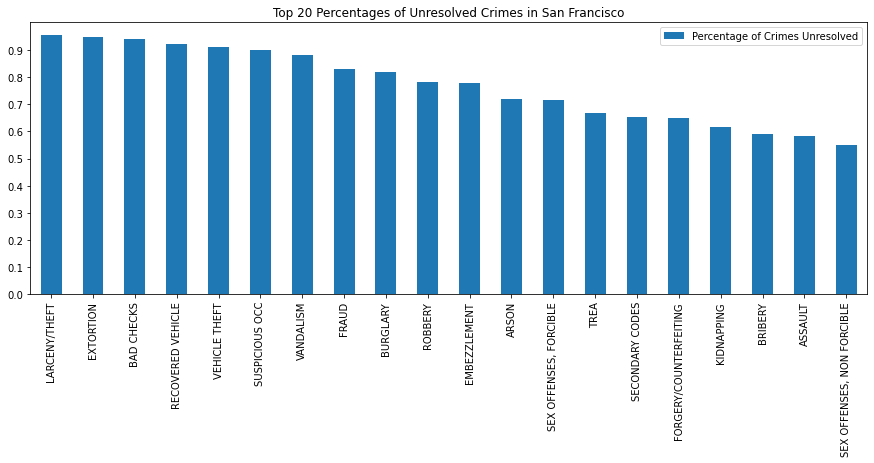

In [17]:
slicedData.plot.bar(figsize = (15,5), title = 'Top 20 Percentages of Unresolved Crimes in San Francisco', yticks = np.arange(0,1,.1))